<a href="https://colab.research.google.com/github/timothylombard/-Python-Data-Visualization-Tutorial/blob/master/pillow_fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pillow

In [12]:
from google.colab import files
uploaded = files.upload()

#push 'msi_recruitment.gif'  and 'fanwood-webfont.ttf' (font file)

Saving fanwood-webfont.ttf to fanwood-webfont.ttf


In [0]:
import os


In [14]:
os.listdir()

['.config', 'fanwood-webfont.ttf', 'readonly', 'sample_data']

In [9]:
os.mkdir('readonly')

FileExistsError: ignored

In [15]:
import shutil
try:
  shutil.move('msi_recruitment.gif', "readonly")
except:
  print("file may have already been moved")
try:
  
  shutil.move('fanwood-webfont.ttf', "readonly")
except:
  print("file may have already been moved")


file may have already been moved


In [16]:
os.listdir('readonly')

['fanwood-webfont.ttf', 'msi_recruitment.gif']

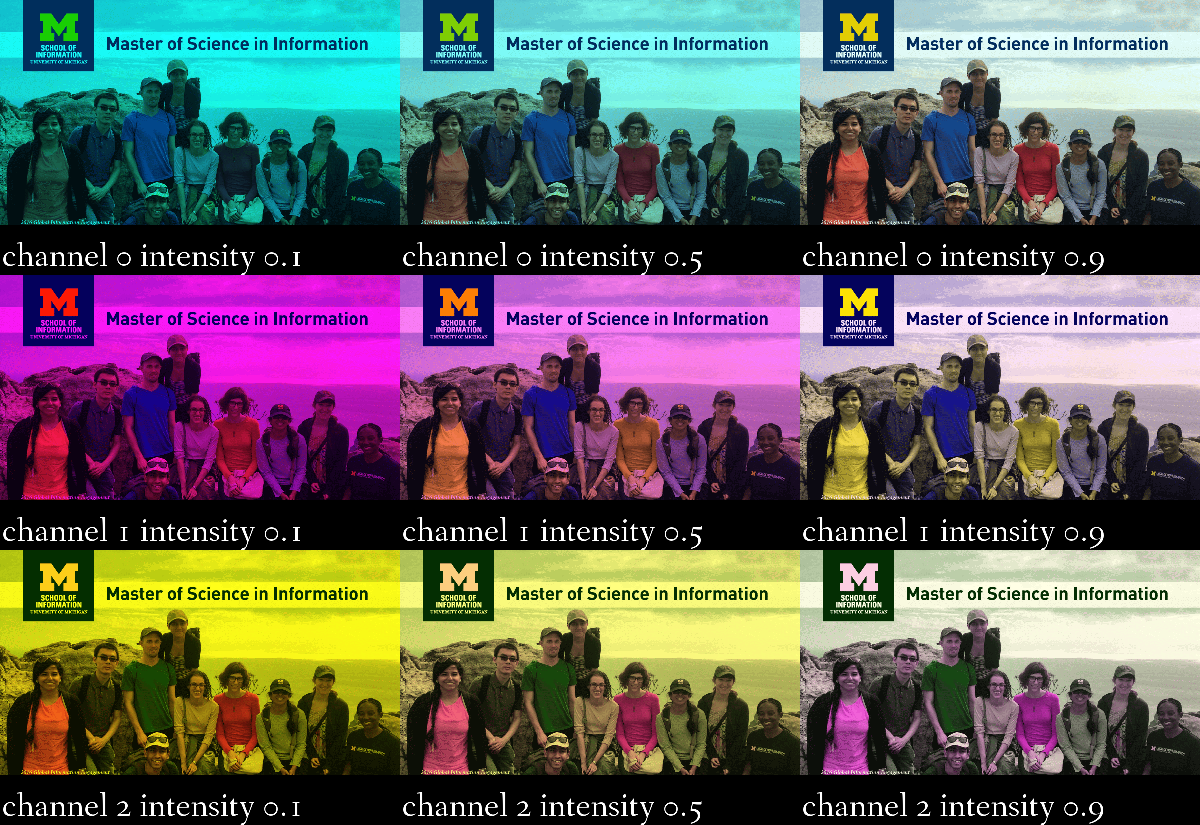

In [20]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')


font = ImageFont.truetype("readonly/fanwood-webfont.ttf", 70)

def channel_adjust(channel, amt):
  adj =  r.point(lambda i: i * amt)
  
  return adj

def add_banner(image, height, text):
  "add banner to bottom of original image hold text"
  size = (image.size[0], image.size[1]+height)
  new = Image.new('RGB', size, (0, 0, 0))
  new.paste(image,(0,0))
  draw = ImageDraw.Draw(new)
  draw.text((5, size[1] - 80),text,(255,255,255),font=font)
  
  return new
  
adjustments = [.1,.5,.9]  
r, g, b = image.split()

images = []


for adjust in adjustments:
  channel = 0
  text = "channel {} intensity {}".format(channel, adjust)
  r1 = channel_adjust(r, adjust)
  im = Image.merge("RGB", (r1,g,b))
  im = add_banner(im, 100, text)
  images.append(im)

for adjust in adjustments:
  channel = 1
  text = "channel {} intensity {}".format(channel, adjust)
  g1 = channel_adjust(g, adjust)
  im = Image.merge("RGB", (r,g1,b))
  im = add_banner(im, 100, text)
  images.append(im)

for adjust in adjustments:
  channel = 2
  text = "channel {} intensity {}".format(channel, adjust)
  b1 = channel_adjust(b, adjust)
  im = Image.merge("RGB", (r,g,b1))
  im = add_banner(im, 100, text)
  images.append(im)
  

first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

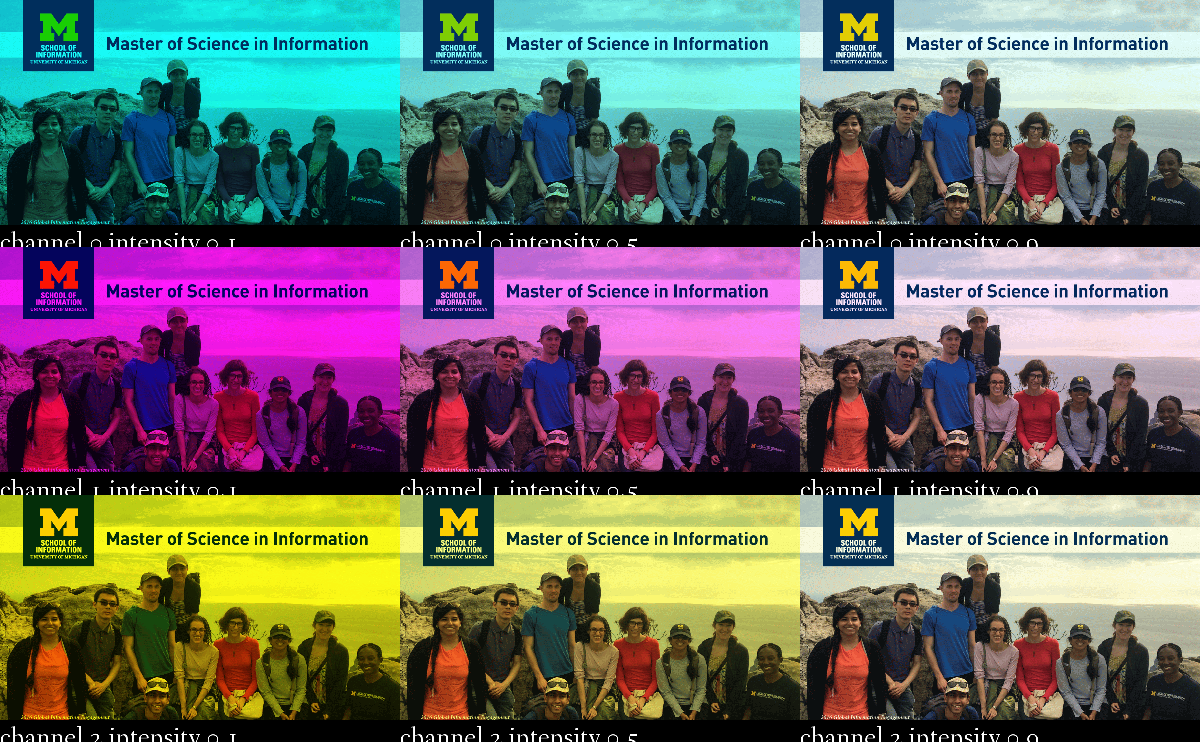

In [18]:
##### Peer check # This was work from one of my peers that I checked.
import PIL
from PIL import Image, ImageFont, ImageDraw
import numpy as np

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different colors
images=[]

# Channel 0 - Red, Channel 1 - Green, Channel 2 - Blue
for channel in range(0, 3):
    # Intensity: 0.1, 0.4. 0.9
    for intensity in np.arange(0.1, 1.0, 0.4):
        # Convert the image object to numpy array
        arr = np.array(image, dtype=float)
        # Update the channel with the intensity
        arr[:,:,channel] = arr[:,:,channel] * intensity
        # Convert the numpy array to an image object and append to the list
        images.append(Image.fromarray(arr.astype(np.uint8)))

# Define an extra text area size in 10% of the image height
TEXT_AREA = image.height // 10

# create a contact sheet from different colors
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3, (first_image.height + TEXT_AREA)*3))
x=0
y=0

# Load the font file
font = ImageFont.truetype("readonly/fanwood-webfont.ttf", size=55)

# Channel 0 - Red, Channel 1 - Green, Channel 2 - Blue
for channel in range(0, 3):
    # Intensity: 0.1, 0.4. 0.9
    for intensity, index in zip(np.arange(0.1, 1.0, 0.4), range(0,3)):
        img = images[channel*3 + index]
        
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y) )
        
        # Write the title to the bottom of the image
        draw = ImageDraw.Draw(contact_sheet)
        draw.text((x, y+img.height), "channel {} intensity {}".format(channel, intensity), font=font, fill=(255,255,255,255))
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+first_image.width == contact_sheet.width:
            x=0
            y=y+first_image.height+TEXT_AREA
        else:
            x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)
